### Haar特征+Adaboost级联分类器
以 Haar特征分类器为基础的对象检测技术是一种非常有效的对象检测技术，多用于人脸检测、行人检测等。Haar-like特征是计算机视觉领域一种常用的特征描述算子，也称为Haar特征。Haar特征就是用下图中黑色矩形所有像素值的和减去白色矩形所有像素值的和。  

<center><img src="images/haar1.png" alt="FAO" width="500"></center> 

Haar特征可以在检测窗口中由放大+平移产生一系列子特征。在论文《Rapid Object Detection using a Boosted Cascade of Simple Features》中，作者使用的检测器设定为24*24的大小，得到了超过180000个特征。  

<center><img src="images/haar2.jpeg" alt="FAO" width="500"></center> 

Haar特征值反映了图像的灰度变化情况，实验证明可以将极少数的特征结合起来，形成有效的分类器。例如：脸部的一些特征能由矩形特征简单的描述，如：眼睛要比脸颊颜色要深，鼻梁两侧比鼻梁颜色要深，嘴巴比周围颜色要深等。为了达到这个目的，我们将每一个特征应用于所有的训练图像（正样本人脸图像，负样本非人脸图像）。我们要选取错误率最低的特征，这说明它们是检测面部和非面部图像最好的特征。作者最终从180000个特征中选择了6061个特征。  

<center><img src="images/haar3.png" alt="FAO" width="400"></center> 

为了找到图像中不同位置的目标，需要逐次移动检测窗口（窗口中的Haar特征相应也随着移动），这样就可以遍历到图像中的每一个位置。而为了检测到不同大小的目标，一般有两种做法：逐步缩小图像或者逐步放大检测窗口，这样即可遍历到图像中不同大小的目标。  

<center><img src="images/haar4.jpeg" alt="FAO" width="500"></center> 

如果对每一个 24x24 的窗口使用这 6061个特征来做检查，看它是不是面部，会比较耗时，所以最好有一个简单的方法来证 明这个窗口不是面部区域，如果不是就直接抛弃，不用对它再做处理。为了达到这个目的作者提出了级联分类器的概念。    
    
不是在一开始就对窗口 进行这 6061个特征测试，将这些特征分成不同组。在不同的分类阶段逐个使用。通常前面很少的几个阶段使用较少的特征检测。研究发现分类器判断不是人脸的正确率很高，判断是人脸的正确率一般。如果一个窗口第一阶段的检测都过不了就可以直接放弃后面的测试了，如果它通过了就进入第二阶段 的检测。如果一个窗口经过了所有的测试，那么这个窗口就被认为是面部区域。  
    
作者将 6061 多个特征分为 38 个阶段，前五个阶段的特征数分别为 1， 10，25，25 和 50。剩下的各层包含的特征数量急剧增多。特征总数是6061个。

<center><img src="images/haar5.png" alt="FAO" width="500"></center> 



In [1]:
from imutils import *

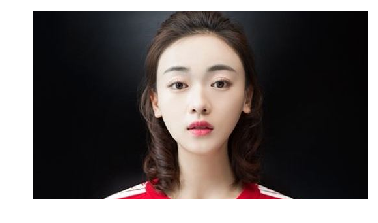

In [2]:
image = imread('face.png')
show(image)

1. image：输入图像 
2. scaleFactor=1.1：这个是每次缩小图像的比例，默认是1.1 
3. minNeighbors=3：匹配成功所需要的周围矩形框的数目，每一个特征匹配到的区域都是一个矩形框，只有多个矩形框同时存在的时候，才认为是匹配成功，比如人脸，这个默认值是3。 
4. minSize：匹配人脸的最小范围 
5. flags=0：可以取如下这些值：  
CASCADE_DO_CANNY_PRUNING=1, 利用canny边缘检测来排除一些边缘很少或者很多的图像区域  
CASCADE_SCALE_IMAGE=2, 正常比例检测  
CASCADE_FIND_BIGGEST_OBJECT=4, 只检测最大的物体  
CASCADE_DO_ROUGH_SEARCH=8 初略的检测 

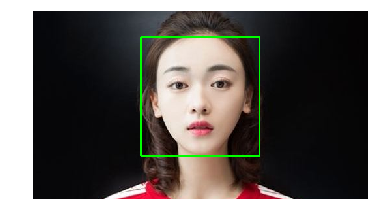

In [3]:
# 级联分类器
detector = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
rects = detector.detectMultiScale(image, scaleFactor=1.1, minNeighbors=2, minSize=(10,10), flags=cv2.CASCADE_SCALE_IMAGE)

for (x,y,w,h) in rects:
    # 画矩形框
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)
    
show(image)

In [4]:
def facedetect(image):
    image = imread(image)
    # 级联分类器
    detector = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
    rects = detector.detectMultiScale(image, scaleFactor=1.1, minNeighbors=2, minSize=(10,10), flags=cv2.CASCADE_SCALE_IMAGE)

    for (x,y,w,h) in rects:
        # 画矩形框
        cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

    show(image)

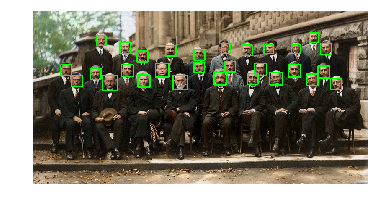

In [5]:
facedetect('Solvay.jpg')